<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: <https://drive.google.com/file/d/1dfbAsM9DwA7tYhInyflIpZnYs7VT-0AQ/view> 

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
 
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/JimKing100/DS-Unit-4-Sprint-2-Neural-Networks/master/module4-Hyperparameter-Tuning/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace= True)
df.TotalCharges.replace([" "], ["0"], inplace= True)
df.TotalCharges = df.TotalCharges.astype(float)
df.drop("customerID", axis= 1, inplace= True)
df.Churn.replace(["Yes", "No"], [1, 0], inplace= True)
data = pd.get_dummies(df)

In [4]:
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [5]:
target = "Churn"
X = data.drop(target, axis= 1)
y = data.Churn

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 500)
X_train.shape

(5634, 46)

In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=46, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
          
    model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])
    return model

In [9]:
model = create_model()

W0205 19:23:11.744133 4386565568 deprecation.py:506] From /Users/JKMacBook/opt/anaconda3/envs/NN/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0205 19:23:12.096272 4386565568 deprecation.py:323] From /Users/JKMacBook/opt/anaconda3/envs/NN/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=10)

Train on 5634 samples, validate on 1409 samples
Epoch 1/40
5634/5634 [==============================] - 3s 610us/sample - loss: 16.6920 - acc: 0.6012 - val_loss: 1.3704 - val_acc: 0.7708
Epoch 2/40
5634/5634 [==============================] - 2s 351us/sample - loss: 1.7441 - acc: 0.6782 - val_loss: 0.5999 - val_acc: 0.7367
Epoch 3/40
5634/5634 [==============================] - 2s 381us/sample - loss: 0.7758 - acc: 0.7181 - val_loss: 0.5361 - val_acc: 0.7367
Epoch 4/40
5634/5634 [==============================] - 2s 353us/sample - loss: 0.6352 - acc: 0.7355 - val_loss: 0.5415 - val_acc: 0.7495
Epoch 5/40
5634/5634 [==============================] - 2s 334us/sample - loss: 0.5624 - acc: 0.7499 - val_loss: 0.5212 - val_acc: 0.7544
Epoch 6/40
5634/5634 [==============================] - 2s 384us/sample - loss: 0.5412 - acc: 0.7558 - val_loss: 0.4859 - val_acc: 0.7885
Epoch 7/40
5634/5634 [==============================] - 2s 336us/sample - loss: 0.5271 - acc: 0.7496 - val_loss: 0.4816 - v

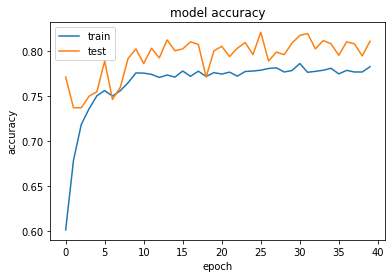

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyperparameter Tuning - Batch Size

In [12]:
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=46, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
          
    model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])
    return model

In [13]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [14]:
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20]}

In [16]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

/Users/JKMacBook/opt/anaconda3/envs/NN/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [17]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.7536386251449585 using {'batch_size': 20, 'epochs': 20}
Means: 0.7344692945480347, Stdev: 0.010687999269161816 with: {'batch_size': 10, 'epochs': 20}
Means: 0.7536386251449585, Stdev: 0.012987407339908778 with: {'batch_size': 20, 'epochs': 20}
Means: 0.7461838920911154, Stdev: 0.023382061605285602 with: {'batch_size': 40, 'epochs': 20}
Means: 0.7515086929003397, Stdev: 0.03129229744570339 with: {'batch_size': 60, 'epochs': 20}
Means: 0.7344692945480347, Stdev: 0.010687999269161816 with: {'batch_size': 80, 'epochs': 20}
Means: 0.7426340182622274, Stdev: 0.019590364395717194 with: {'batch_size': 100, 'epochs': 20}


### Hyperparameter Tuning - Epochs

In [19]:
# define the grid search parameters
#param_grid = {'batch_size': [20],
#              'epochs': [20, 40, 60, 100]}

In [20]:
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
#grid_result = grid.fit(X_train, y_train)

In [21]:
#print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print(f"Means: {mean}, Stdev: {stdev} with: {param}")
# Result = epochs 100

Best: 0.7673056523005167 using {'batch_size': 20, 'epochs': 100}
Means: 0.7465388576189677, Stdev: 0.006433993465673164 with: {'batch_size': 20, 'epochs': 20}
Means: 0.7596734166145325, Stdev: 0.028557187198789982 with: {'batch_size': 20, 'epochs': 40}
Means: 0.7570110162099203, Stdev: 0.02703387771219089 with: {'batch_size': 20, 'epochs': 60}
Means: 0.7673056523005167, Stdev: 0.035587377450326814 with: {'batch_size': 20, 'epochs': 100}


### Hyperparameter Tuning - Optimizer

In [47]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(16, input_dim=46, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
          
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics=['accuracy'])
    return model

In [48]:
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=100, verbose=0)

In [49]:
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

In [50]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

In [51]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.768725593884786 using {'optimizer': 'RMSprop'}
Means: 0.7344692945480347, Stdev: 0.010687999269161816 with: {'optimizer': 'SGD'}
Means: 0.768725593884786, Stdev: 0.01331084266667604 with: {'optimizer': 'RMSprop'}
Means: 0.6293929616610209, Stdev: 0.17807712960250044 with: {'optimizer': 'Adagrad'}
Means: 0.5997515022754669, Stdev: 0.22568220835254565 with: {'optimizer': 'Adadelta'}
Means: 0.7527511517206827, Stdev: 0.02547143144977909 with: {'optimizer': 'Adam'}
Means: 0.7561235427856445, Stdev: 0.003043390136260709 with: {'optimizer': 'Adamax'}
Means: 0.7419240474700928, Stdev: 0.01805383025200811 with: {'optimizer': 'Nadam'}


### Hyperparameter Tuning - Learning Rate

In [52]:
from tensorflow.keras.optimizers import RMSprop

def create_model(learn_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=46, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics=['accuracy'])
    return model

In [53]:
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=100, verbose=0)

In [54]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learn_rate=learn_rate)

In [55]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

## Stretch Goals:

- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimiation tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
 - Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
 - Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?